# color segmentation

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

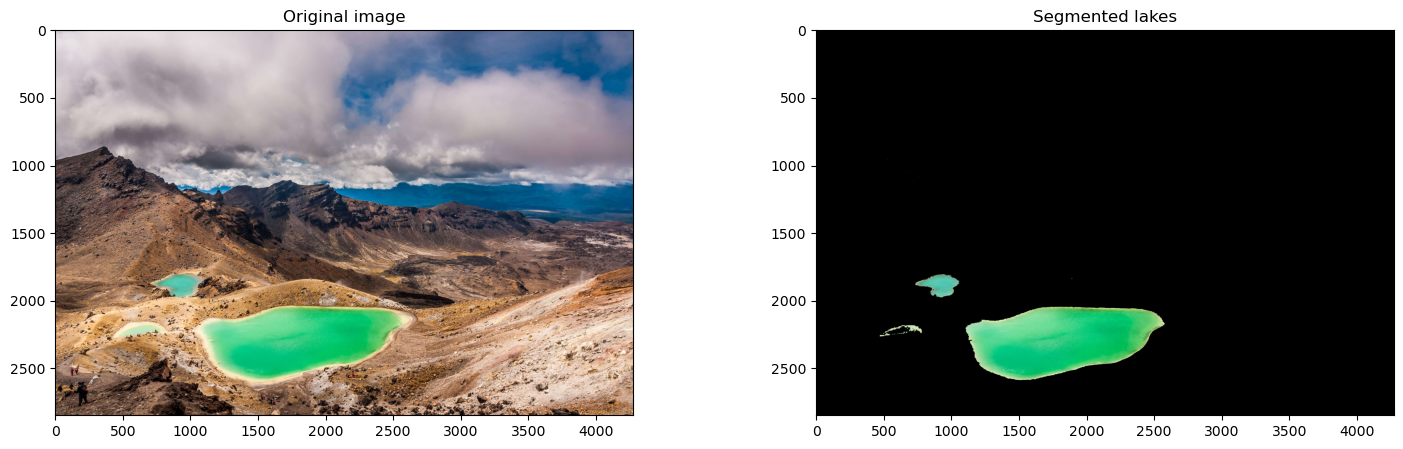

In [25]:
img = cv2.imread('Emerald_Lakes_New_Zealand.jpg', cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Set range for green color.
g_lb = np.array([32, 50, 50], np.uint8)
g_ub = np.array([90, 255, 255], np.uint8)
g_mask = cv2.inRange(img_hsv, g_lb, g_ub)
g_seg = cv2.bitwise_and(img, img, mask = g_mask)
plt.figure(figsize = (18, 5))
plt.subplot(121); plt.imshow(img[:,:,::-1]); plt.title('Original image')
plt.subplot(122); plt.imshow(g_seg[:,:,::-1]); plt.title('Segmented lakes');                             

# Deforestation analysis using color segmentation

In [32]:
import cv2 
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

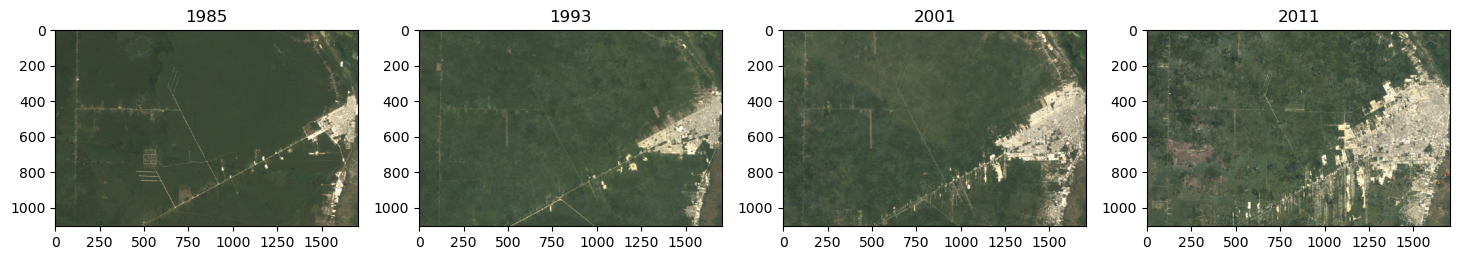

In [113]:
image1 = cv2.imread('1985.png')
image2 = cv2.imread('1993.png')
image3 = cv2.imread('2001.png')
image4 = cv2.imread('2011.png')
images = [image1[...,::-1], image2[:,:,::-1], image3[:,:,::-1], image4[:,:,::-1]]
image_title = ['1985', '1993', '2001', '2011']
plt.figure(figsize = [18, 5]) 
for i in range(4):
      plt.subplot(1,4,i+1); plt.imshow(images[i]);plt.title(image_title[i])

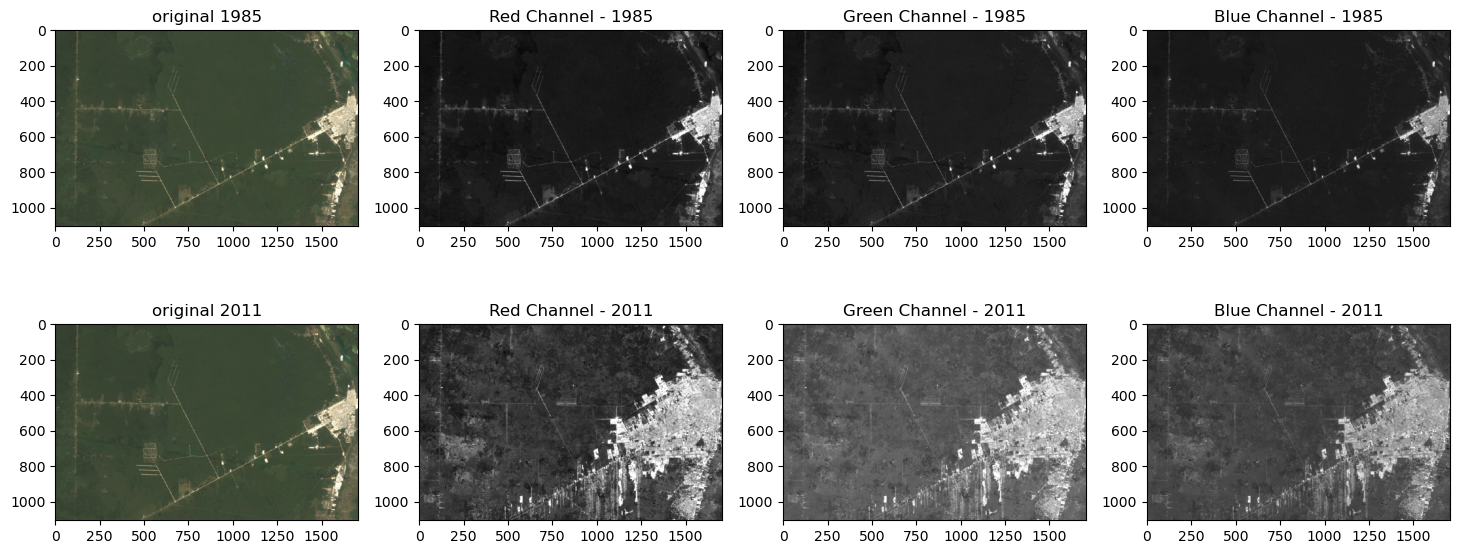

In [52]:
b1, g1, r1 = cv2.split(image1)
b4, g4, r4 = cv2.split(image4)
plt.figure(figsize = [18, 7])
plt.subplot(241);plt.imshow(image1[:, :, ::-1]);plt.title('original 1985')
plt.subplot(242); plt.imshow(r1); plt.title('Red Channel - 1985')
plt.subplot(243); plt.imshow(g1); plt.title('Green Channel - 1985')
plt.subplot(244); plt.imshow(b1); plt.title('Blue Channel - 1985')
plt.subplot(245);plt.imshow(image1[:, :, ::-1]);plt.title('original 2011')
plt.subplot(246); plt.imshow(r4); plt.title('Red Channel - 2011')
plt.subplot(247); plt.imshow(g4); plt.title('Green Channel - 2011')
plt.subplot(248); plt.imshow(b4); plt.title('Blue Channel - 2011');

In [62]:
def img_hist(image, title='', yscale = 'linear'):
    hist_b = cv2.calcHist([image], [0], None, [256], [0, 255])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 255])
    hist_r = cv2.calcHist([image], [2], None, [256], [0, 255])
    histbgr = [hist_b, hist_g, hist_r]
    color = ['b', 'g', 'r']
    label = ['blue', 'green', 'red']
    fig = plt.figure(figsize = [18,5])
    fig.suptitle(title)
    for i in range(3):
        ax = fig.add_subplot(1, 3, i+1)
        ax.set_yscale(yscale)
        plt.plot(histbgr[i], color = color[i], label = label[i])
        ax.grid()
        ax.legend()
    

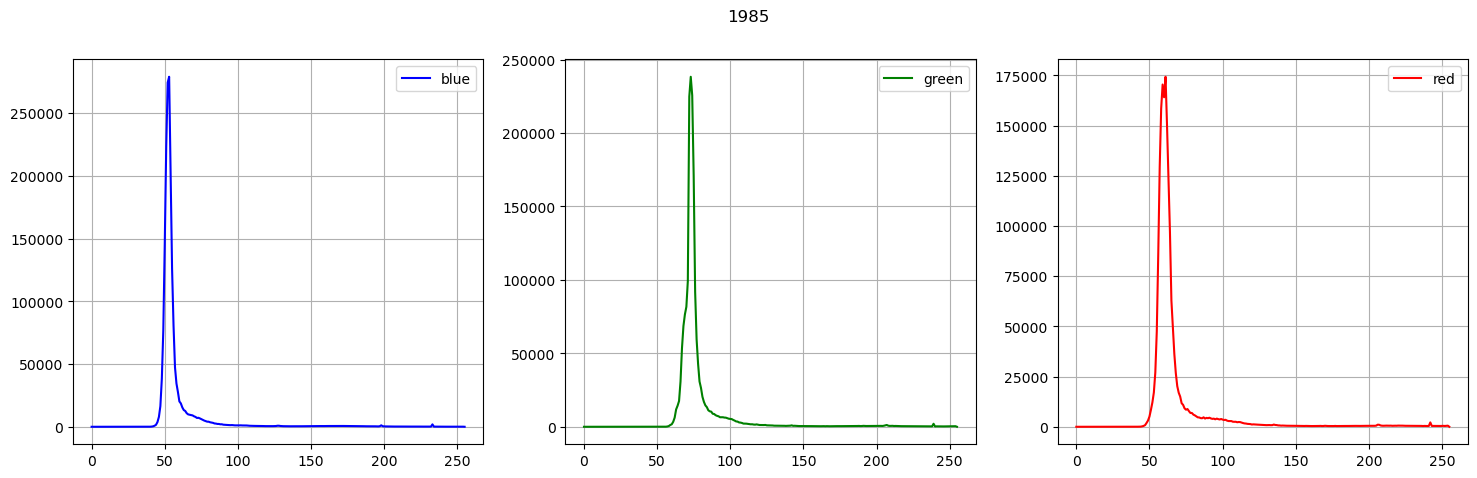

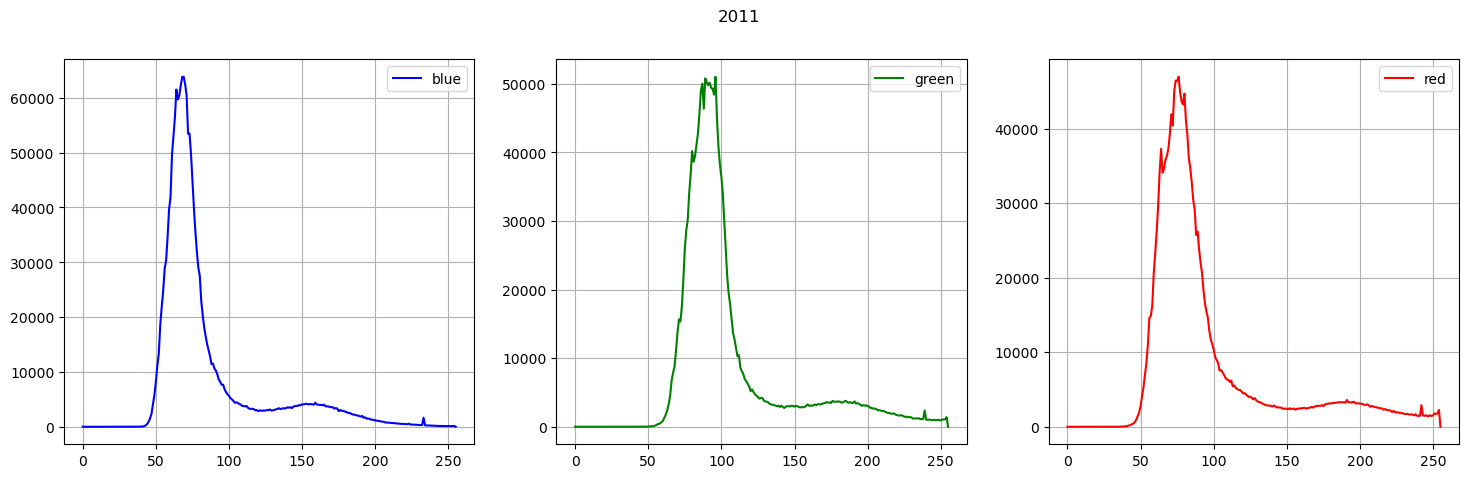

In [64]:
img_hist(image1, '1985')
img_hist(image4, '2011')

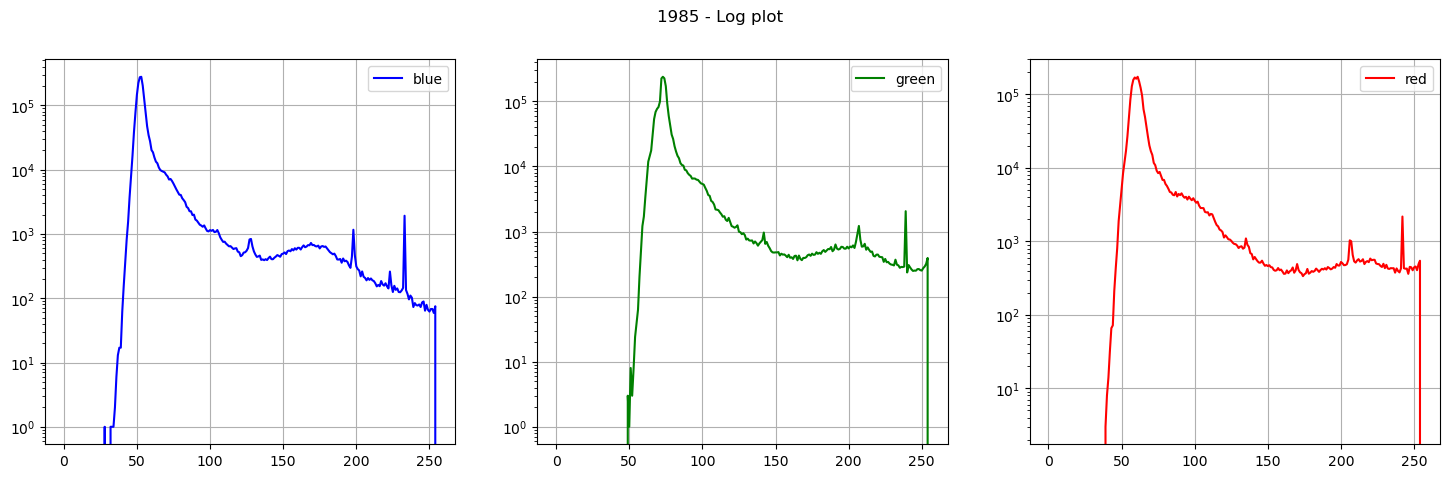

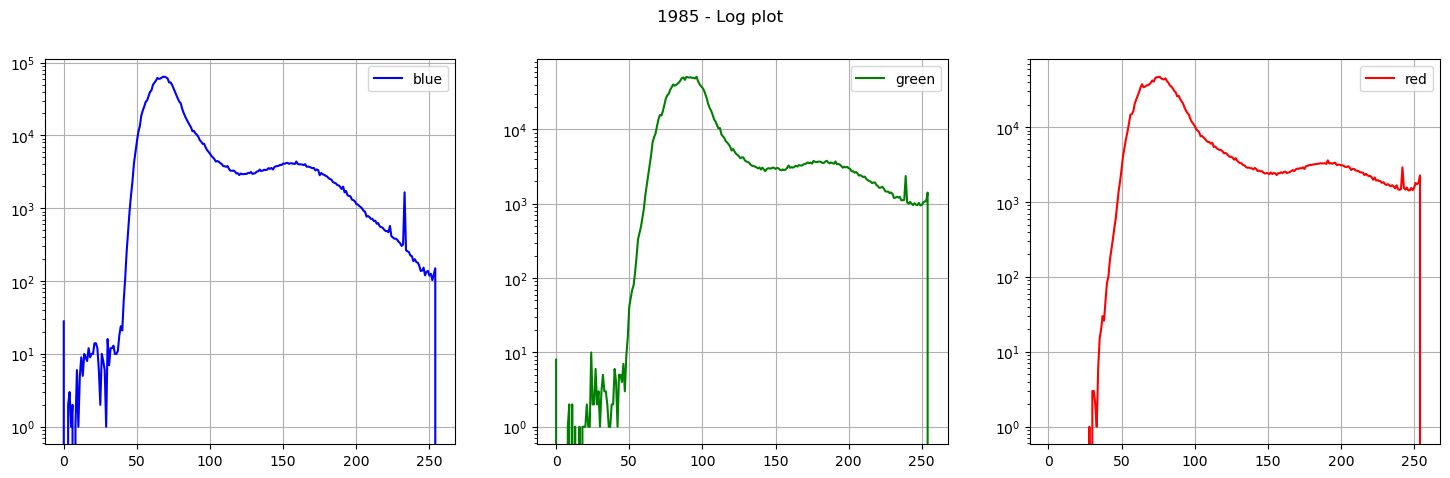

In [65]:
img_hist(image1, '1985 - Log plot', 'log')
img_hist(image4, '1985 - Log plot', 'log')

In [109]:
def draw_image_histogram_hsv(image, title = '', yscale = 'linear'):
    """Utility to plot histograms for the hue, saturation, value channels independently."""
    HSV_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    histH = cv2.calcHist([HSV_image], [0], None, [180], [0, 179])
    histS = cv2.calcHist([HSV_image], [1], None, [256], [0, 255])
    histV = cv2.calcHist([HSV_image], [2], None, [256], [0, 255])
    
    # Plot the histograms for each channel.
    fig = plt.figure(figsize = [20, 5])
    fig.suptitle(title)
    
    ax = fig.add_subplot(1, 3, 1)
    ax.set_yscale(yscale)
    plt.plot(histH, color = 'b', label = 'Hue')
    ax.grid()
    ax.legend()
    
    ax = fig.add_subplot(1, 3, 2)
    ax.set_yscale(yscale)
    plt.plot(histS, color = 'g', label = 'Saturation')
    ax.grid()
    ax.legend()
    
    ax = fig.add_subplot(1, 3, 3)
    ax.set_yscale(yscale)
    plt.plot(histV, color = 'r', label = 'Value')
    ax.grid()
    ax.legend()
    
    plt.show()

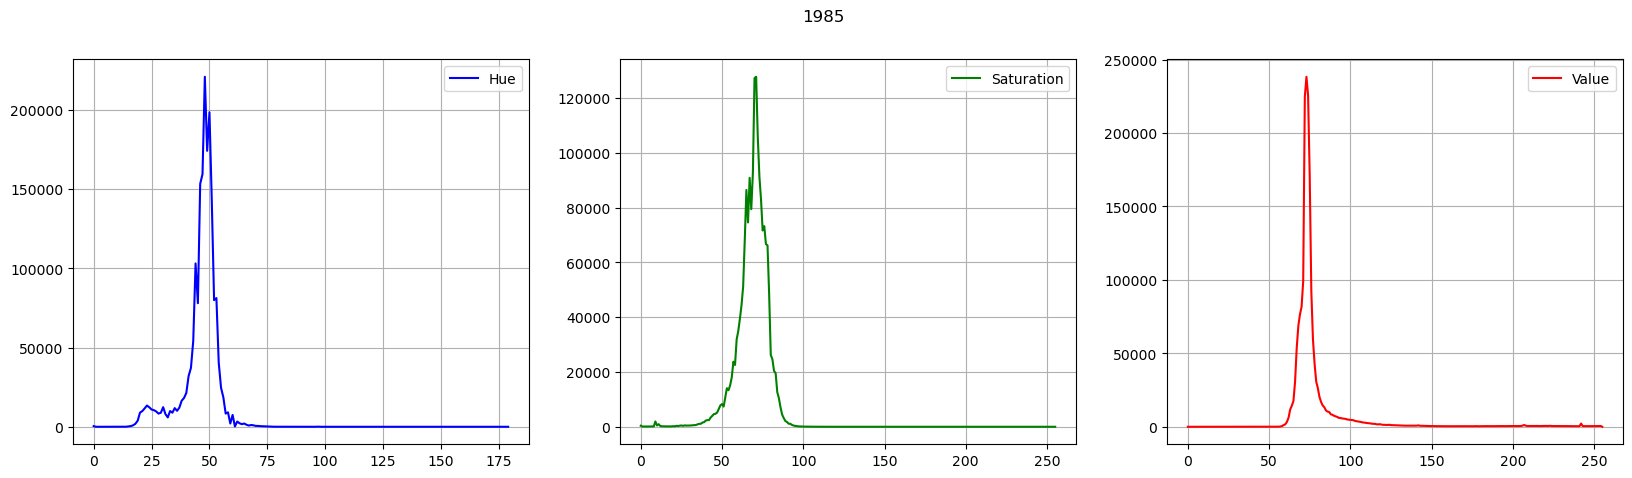

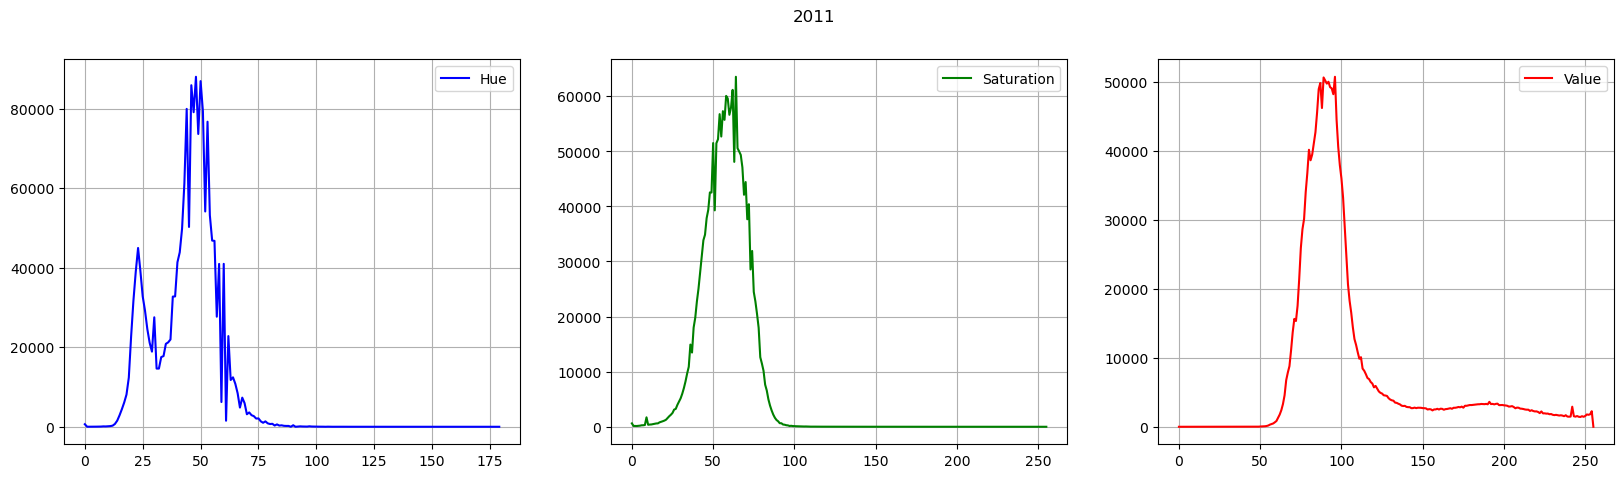

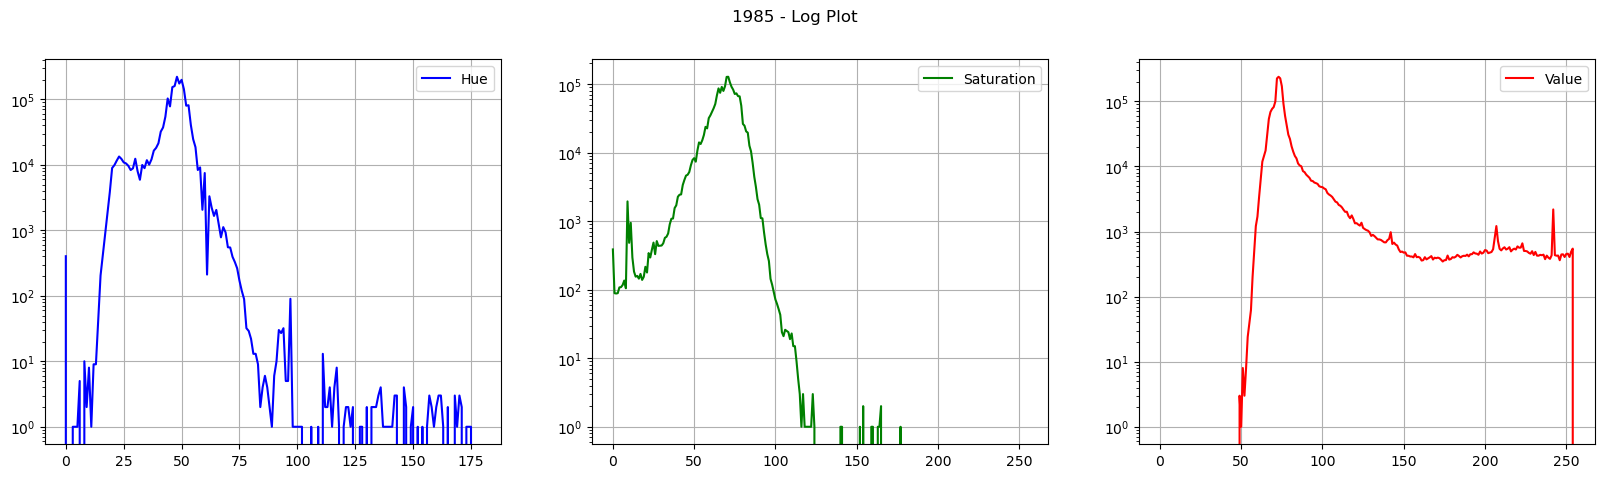

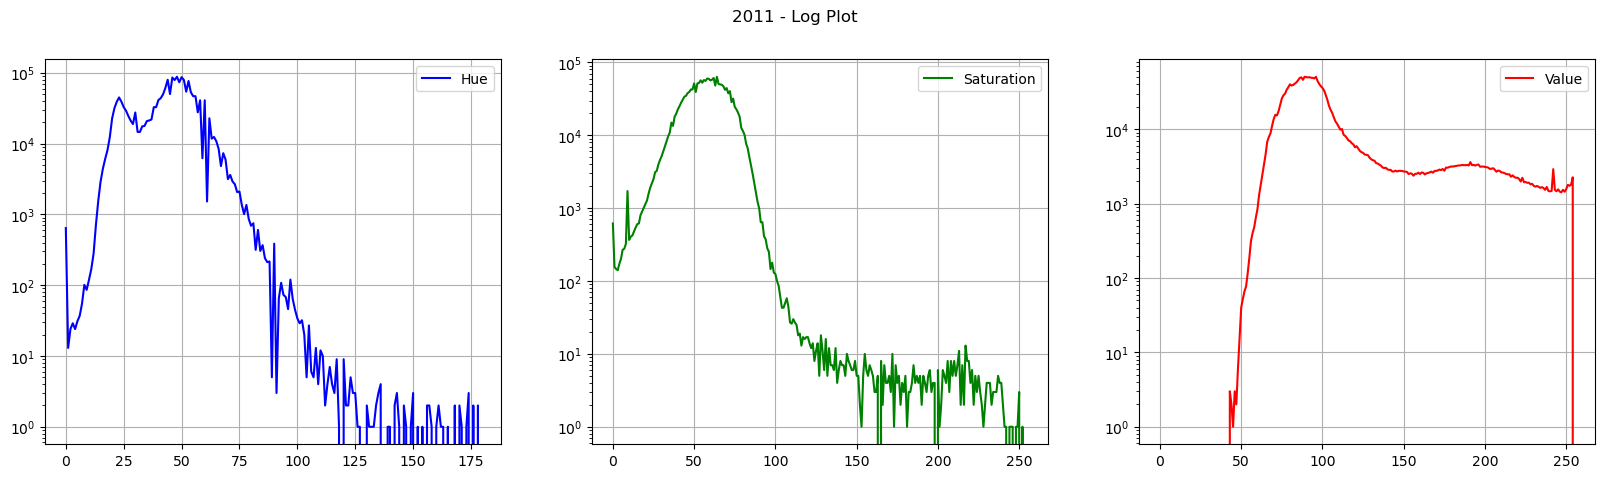

In [110]:
# calculate and draw the histograms for the images
draw_image_histogram_hsv(image1, '1985')
draw_image_histogram_hsv(image4, '2011')

# Display the Log plots
draw_image_histogram_hsv(image1, '1985 - Log Plot','log')
draw_image_histogram_hsv(image4, '2011 - Log Plot','log')

In [100]:
def detect_green_bgr(img):
    lr_bgr = np.array([0, 50, 0], dtype = 'uint8')
    up_bgr = np.array([255, 100, 255], dtype = 'uint8')
    mask_bgr = cv2.inRange(img, lr_bgr, up_bgr)
    return mask_bgr

In [105]:
def detect_green_hsv(img):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lr_hsv = np.array([36, 0, 50], dtype = 'uint8')
    up_hsv= np.array([86,250, 100], dtype = 'uint8')
    mask_hsv = cv2.inRange(img_hsv, lr_hsv, up_hsv)
    return mask_hsv

In [106]:
def percent_forest(img):
    c = cv2.countNonZero(img)
    t = img.shape[0] * img.shape[1]
    return round((c/t)*100, 2)

In [114]:
def compare_bgr_hsv(img, image_name = ''):
    segmented_green_hsv = detect_green_hsv(img)
    green_ratio_hsv = percent_forest(segmented_green_hsv)
    
    segmented_green_bgr = detect_green_bgr(img)
    green_ratio_bgr = percent_forest(segmented_green_bgr)

    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(1, 3, 1)
    plt.imshow(img[:, :, ::-1])
    ax.set_title('Original - ' + image_name)
    
    ax = fig.add_subplot(1, 3, 2)
    plt.imshow(segmented_green_hsv, cmap = 'gray')
    ax.set_title('Color Segmented using HSV Color Space: ' + str(green_ratio_hsv) + '%')
    
    ax = fig.add_subplot(1, 3, 3)
    plt.imshow(segmented_green_bgr, cmap = 'gray')
    ax.set_title('Color Segmented using BGR Color Space: ' + str(green_ratio_bgr) + '%')
    
    plt.show()

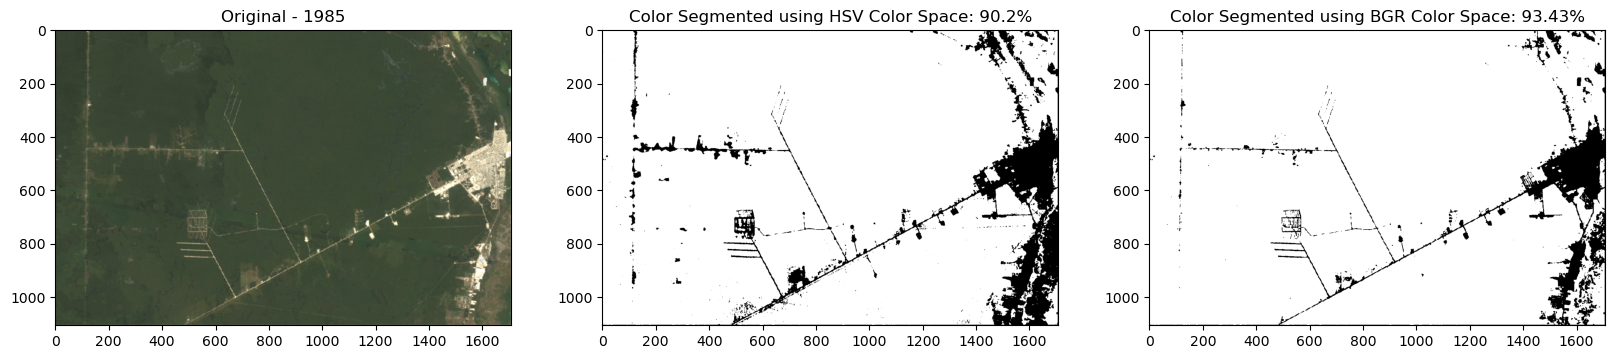

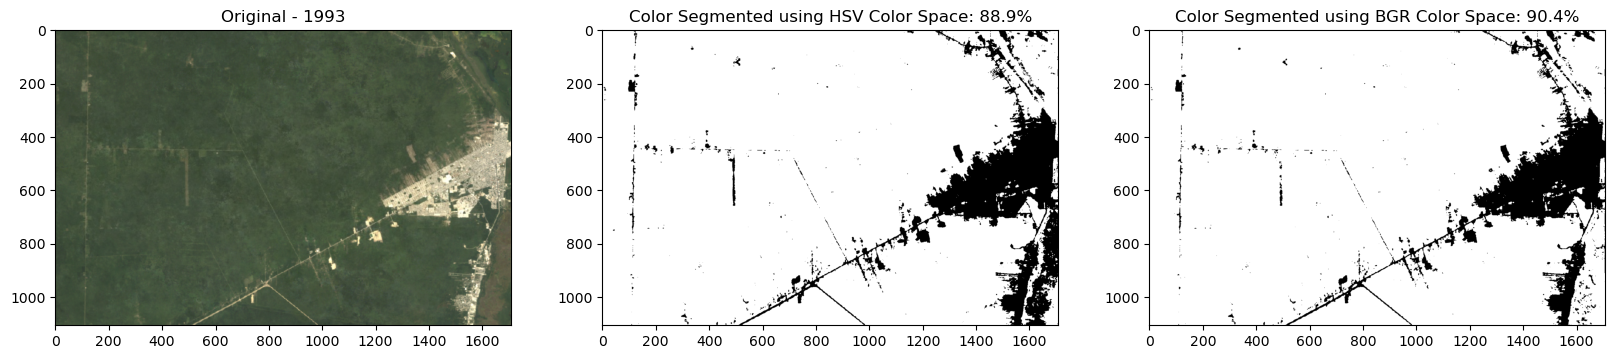

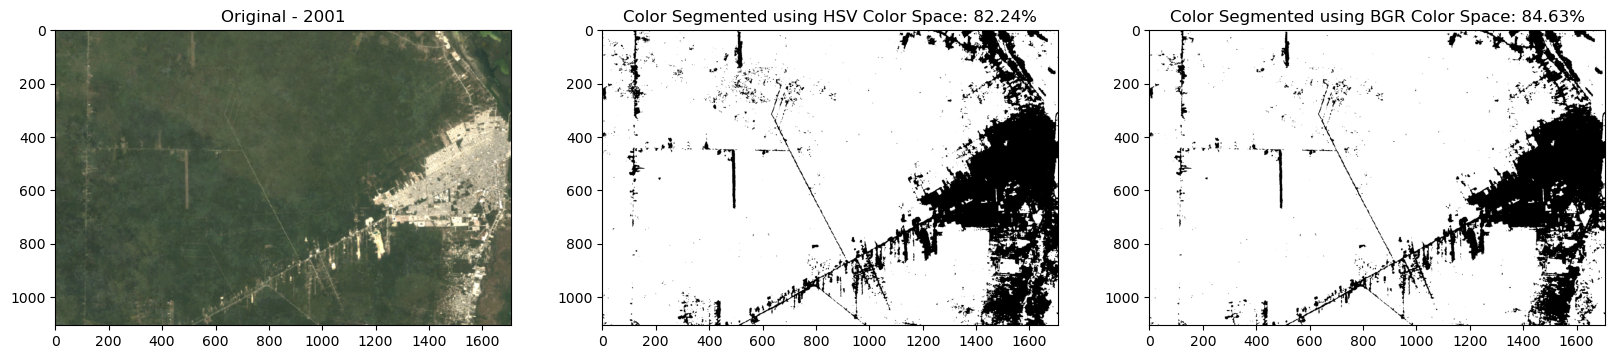

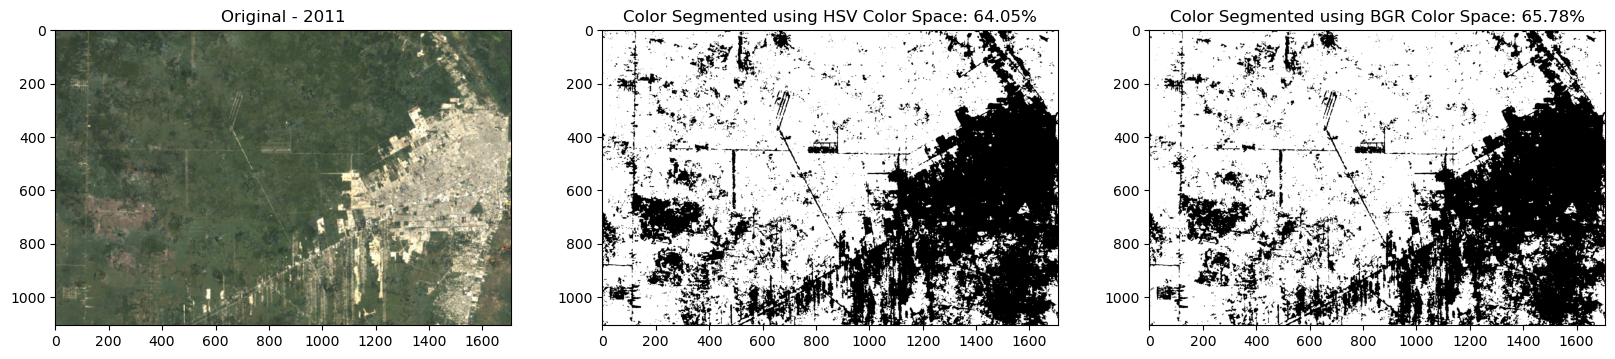

In [115]:
compare_bgr_hsv(image1, '1985')
compare_bgr_hsv(image2, '1993')
compare_bgr_hsv(image3, '2001')
compare_bgr_hsv(image4, '2011')


In [118]:
lr_bgr = np.array([0, 50, 0], dtype = 'uint8')
up_bgr = np.array([255, 100, 255], dtype = 'uint8')
mask_bgr = cv2.inRange(image1, lr_bgr, up_bgr)

In [119]:
print(mask_bgr)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]
